In [1]:
!pip install jovian --upgrade --quiet
import jovian

In [2]:
!pip install pandas --upgrade --quiet
import pandas as pd 
!pip install matplotlib --upgrade --quiet
!pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt
!pip install numpy --upgrade --quiet
import numpy as np
%matplotlib inline

In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [4]:
jovian.commit(file=["eq_dataset_15_12_20.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mrittrukhuda/eq-prediction-linear-regression-model" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/mrittrukhuda/eq-prediction-linear-regression-model


'https://jovian.ai/mrittrukhuda/eq-prediction-linear-regression-model'

In [5]:
eq_df=pd.read_csv("eq_dataset_15_12_20.csv")
eq_df

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp
0,2020,12,10,16:56:51,26.1587,90.5570,35.3,4.3,"7 km WSW of Goālpāra, India",1607619411
1,2020,12,10,16:33:08,37.1284,71.6137,114.5,4.2,"40 km S of Khorugh, Tajikistan",1607617988
2,2020,12,8,08:49:55,31.5693,104.3594,10.0,4.5,"32 km WNW of Mianyang, China",1607417395
3,2020,12,8,05:14:35,22.1912,94.3800,91.0,5.1,"78 km W of Monywa, Myanmar",1607404475
4,2020,12,6,14:39:13,21.8358,93.4233,52.6,4.6,"85 km SSE of Saiha, India",1607265553
...,...,...,...,...,...,...,...,...,...,...
24701,1970,2,24,02:07:35,30.6070,103.2030,15.0,5.6,"eastern Sichuan, China",4673255
24702,1970,2,6,22:10:41,23.0830,100.7710,10.0,6.1,"Yunnan, China",3190241
24703,1970,2,5,03:40:03,24.3710,102.3020,23.5,5.8,"Yunnan, China",3037203
24704,1970,1,5,11:49:10,23.9840,102.7320,15.0,5.9,"Yunnan, China",388150


In [6]:
eq_df1= eq_df.copy(deep=True)
eq_df1

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp
0,2020,12,10,16:56:51,26.1587,90.5570,35.3,4.3,"7 km WSW of Goālpāra, India",1607619411
1,2020,12,10,16:33:08,37.1284,71.6137,114.5,4.2,"40 km S of Khorugh, Tajikistan",1607617988
2,2020,12,8,08:49:55,31.5693,104.3594,10.0,4.5,"32 km WNW of Mianyang, China",1607417395
3,2020,12,8,05:14:35,22.1912,94.3800,91.0,5.1,"78 km W of Monywa, Myanmar",1607404475
4,2020,12,6,14:39:13,21.8358,93.4233,52.6,4.6,"85 km SSE of Saiha, India",1607265553
...,...,...,...,...,...,...,...,...,...,...
24701,1970,2,24,02:07:35,30.6070,103.2030,15.0,5.6,"eastern Sichuan, China",4673255
24702,1970,2,6,22:10:41,23.0830,100.7710,10.0,6.1,"Yunnan, China",3190241
24703,1970,2,5,03:40:03,24.3710,102.3020,23.5,5.8,"Yunnan, China",3037203
24704,1970,1,5,11:49:10,23.9840,102.7320,15.0,5.9,"Yunnan, China",388150


In [7]:
eq_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24706 entries, 0 to 24705
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       24706 non-null  int64  
 1   Month      24706 non-null  int64  
 2   Day        24706 non-null  int64  
 3   Time       24706 non-null  object 
 4   Lat        24706 non-null  float64
 5   Lon        24706 non-null  float64
 6   Depth      24706 non-null  float64
 7   Mag        24706 non-null  float64
 8   Region     24706 non-null  object 
 9   Timestamp  24706 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 1.9+ MB


In [8]:
eq_df1.shape

(24706, 10)

In [9]:
help(eq_df1.drop)

Help on method drop in module pandas.core.frame:

drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise') method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index : single label or list-like
        Alternative to specifying axis (``labels, axis=0``
        is equivalent to ``index=labels``).
    columns : single label or list-like
        Alternative to specifying axis (``labels, axis=1``
        is equivale

In [10]:
#dropping two last columns!
eq_df2= eq_df1.drop(["Region", "Timestamp"], axis=1)
eq_df2

,Year,Month,Day,Time,Lat,Lon,Depth,Mag
0,2020,12,10,16:56:51,26.1587,90.5570,35.3,4.3
1,2020,12,10,16:33:08,37.1284,71.6137,114.5,4.2
2,2020,12,8,08:49:55,31.5693,104.3594,10.0,4.5
3,2020,12,8,05:14:35,22.1912,94.3800,91.0,5.1
4,2020,12,6,14:39:13,21.8358,93.4233,52.6,4.6
...,...,...,...,...,...,...,...,...
24701,1970,2,24,02:07:35,30.6070,103.2030,15.0,5.6
24702,1970,2,6,22:10:41,23.0830,100.7710,10.0,6.1
24703,1970,2,5,03:40:03,24.3710,102.3020,23.5,5.8
24704,1970,1,5,11:49:10,23.9840,102.7320,15.0,5.9


In [11]:
eq_df2.columns

Index(['Year', 'Month', 'Day', 'Time', 'Lat', 'Lon', 'Depth', 'Mag'], dtype='object')

In [12]:
num_rows= len(eq_df2.index)
num_rows

24706

In [13]:
input_cols =eq_df2.columns[:7]    #excluding Region column!
input_cols

Index(['Year', 'Month', 'Day', 'Time', 'Lat', 'Lon', 'Depth'], dtype='object')

In [14]:
output_cols =[eq_df2.columns[-1]]     # make sure it's a list! 
output_cols

['Mag']

In [15]:
len(output_cols)

1

In [16]:
eq_df2.Mag.max()

7.9

In [17]:
eq_df2.Mag.min()

1.7

In [18]:
eq_df2.Mag.mean()

4.393183841981726

In [19]:
eq_df2.dtypes

Year       int64
Month      int64
Day        int64
Time      object
Lat      float64
Lon      float64
Depth    float64
Mag      float64
dtype: object

In [20]:
#finding out is there any column has the dtype object..it will represent those columns TRUE!
eq_df2.dtypes==np.object

Year     False
Month    False
Day      False
Time      True
Lat      False
Lon      False
Depth    False
Mag      False
dtype: bool

In [21]:
#converting dtype object to category!
eq_df2["Time"]= eq_df2.Time.astype("category").cat.codes

In [22]:
eq_df2.dtypes

Year       int64
Month      int64
Day        int64
Time       int16
Lat      float64
Lon      float64
Depth    float64
Mag      float64
dtype: object

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


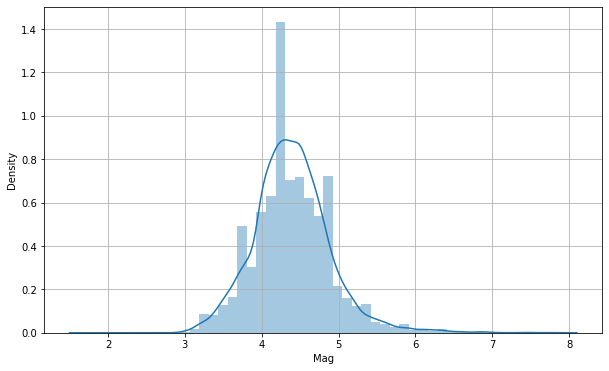

In [23]:
plt.figure(figsize=(10, 6))
sns.distplot(eq_df1.Mag)
plt.grid()


In [24]:
eq_df2[input_cols]

,Year,Month,Day,Time,Lat,Lon,Depth
0,2020,12,10,14968,26.1587,90.5570,35.3
1,2020,12,10,14595,37.1284,71.6137,114.5
2,2020,12,8,7709,31.5693,104.3594,10.0
3,2020,12,8,4719,22.1912,94.3800,91.0
4,2020,12,6,12807,21.8358,93.4233,52.6
...,...,...,...,...,...,...,...
24701,1970,2,24,1981,30.6070,103.2030,15.0
24702,1970,2,6,19830,23.0830,100.7710,10.0
24703,1970,2,5,3368,24.3710,102.3020,23.5
24704,1970,1,5,10224,23.9840,102.7320,15.0


In [25]:
inputs_array= eq_df2[input_cols].to_numpy()
inputs_array

array([[2.020000e+03, 1.200000e+01, 1.000000e+01, ..., 2.615870e+01,
        9.055700e+01, 3.530000e+01],
       [2.020000e+03, 1.200000e+01, 1.000000e+01, ..., 3.712840e+01,
        7.161370e+01, 1.145000e+02],
       [2.020000e+03, 1.200000e+01, 8.000000e+00, ..., 3.156930e+01,
        1.043594e+02, 1.000000e+01],
       ...,
       [1.970000e+03, 2.000000e+00, 5.000000e+00, ..., 2.437100e+01,
        1.023020e+02, 2.350000e+01],
       [1.970000e+03, 1.000000e+00, 5.000000e+00, ..., 2.398400e+01,
        1.027320e+02, 1.500000e+01],
       [1.970000e+03, 1.000000e+00, 4.000000e+00, ..., 2.418500e+01,
        1.025430e+02, 1.130000e+01]])

In [26]:
targets_array= eq_df2[output_cols].to_numpy()
targets_array

array([[4.3],
       [4.2],
       [4.5],
       ...,
       [5.8],
       [5.9],
       [7.1]])

In [27]:
#converting inputs_array and targets_array to tensors!
inputs=torch.from_numpy(inputs_array)
inputs

tensor([[2.0200e+03, 1.2000e+01, 1.0000e+01,  ..., 2.6159e+01, 9.0557e+01,
         3.5300e+01],
        [2.0200e+03, 1.2000e+01, 1.0000e+01,  ..., 3.7128e+01, 7.1614e+01,
         1.1450e+02],
        [2.0200e+03, 1.2000e+01, 8.0000e+00,  ..., 3.1569e+01, 1.0436e+02,
         1.0000e+01],
        ...,
        [1.9700e+03, 2.0000e+00, 5.0000e+00,  ..., 2.4371e+01, 1.0230e+02,
         2.3500e+01],
        [1.9700e+03, 1.0000e+00, 5.0000e+00,  ..., 2.3984e+01, 1.0273e+02,
         1.5000e+01],
        [1.9700e+03, 1.0000e+00, 4.0000e+00,  ..., 2.4185e+01, 1.0254e+02,
         1.1300e+01]], dtype=torch.float64)

In [28]:
targets= torch.from_numpy(targets_array)
targets

tensor([[4.3000],
        [4.2000],
        [4.5000],
        ...,
        [5.8000],
        [5.9000],
        [7.1000]], dtype=torch.float64)

Note: why are we using float32? 
 check this out:   https://www.quora.com/When-should-I-use-tf-float32-vs-tf-float64-in-TensorFlow

In [29]:
inputs=torch.from_numpy(inputs_array).float()     #using .float() to get the float32!
inputs

tensor([[2.0200e+03, 1.2000e+01, 1.0000e+01,  ..., 2.6159e+01, 9.0557e+01,
         3.5300e+01],
        [2.0200e+03, 1.2000e+01, 1.0000e+01,  ..., 3.7128e+01, 7.1614e+01,
         1.1450e+02],
        [2.0200e+03, 1.2000e+01, 8.0000e+00,  ..., 3.1569e+01, 1.0436e+02,
         1.0000e+01],
        ...,
        [1.9700e+03, 2.0000e+00, 5.0000e+00,  ..., 2.4371e+01, 1.0230e+02,
         2.3500e+01],
        [1.9700e+03, 1.0000e+00, 5.0000e+00,  ..., 2.3984e+01, 1.0273e+02,
         1.5000e+01],
        [1.9700e+03, 1.0000e+00, 4.0000e+00,  ..., 2.4185e+01, 1.0254e+02,
         1.1300e+01]])

In [30]:
inputs.dtype    #checking

torch.float32

In [31]:
targets= torch.from_numpy(targets_array).float()
targets

tensor([[4.3000],
        [4.2000],
        [4.5000],
        ...,
        [5.8000],
        [5.9000],
        [7.1000]])

In [32]:
targets.dtype

torch.float32

Now we need to craete pytorch datasets & dataloaders for training & validation. We are gonna create a TensorDataset!

In [33]:
TensorDataset(inputs, targets)

In [34]:
dataset =TensorDataset(inputs, targets)

In [35]:
#picking a val_percent between 0.1 and 0.2 to determine the fraction of data that will be used for creating the validation set. Then use random_split to create training & validation datasets.
val_percent =0.1 #between 0.1 an d 0.2
num_rows

24706

In [36]:
num_rows*val_percent

2470.6000000000004

In [37]:
int(num_rows*val_percent)

2470

In [38]:
val_percent =0.1
val_size =int(num_rows*val_percent)
train_size= num_rows - val_size
train_size

22236

In [39]:
# Use the random_split function to split dataset into 2 parts of the desired length
train_ds, val_ds=random_split(dataset, [train_size, val_size])

Now, we can create Data Loaders for training & validation!

In [40]:
#picking  a batch size!
batch_size =600

Note: check this out to know more about DataLoader in details: 
https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None, *, prefetch_factor=2,
           persistent_workers=False)

In [41]:
train_loader =DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [42]:
#looking at a batch of data
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[2001.0000,    8.0000,   26.0000,  ...,   36.4250,   70.7650,
          200.0000],
        [1999.0000,    8.0000,   15.0000,  ...,   18.3890,   96.2280,
           18.4000],
        [1997.0000,   12.0000,   30.0000,  ...,   25.3620,   96.5710,
           33.0000],
        ...,
        [2008.0000,    7.0000,   18.0000,  ...,   32.3900,  105.3430,
           10.0000],
        [2013.0000,   11.0000,   17.0000,  ...,   36.5095,   70.3418,
          195.7000],
        [1983.0000,   12.0000,   31.0000,  ...,   36.7850,   70.5370,
          147.3000]])
targets: tensor([[4.1000],
        [5.2000],
        [4.7000],
        [4.0000],
        [5.2000],
        [5.3000],
        [4.4000],
        [4.4000],
        [4.8000],
        [3.1000],
        [4.7000],
        [3.9000],
        [3.4000],
        [4.7000],
        [4.2000],
        [4.3000],
        [3.7000],
        [4.8000],
        [3.8000],
        [3.8000],
        [4.4000],
        [3.9000],
        [4.4000],
        [

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mrittrukhuda/eq-prediction-linear-regression-model" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/mrittrukhuda/eq-prediction-linear-regression-model


'https://jovian.ai/mrittrukhuda/eq-prediction-linear-regression-model'

### Creating a Linear Regression model!

In [44]:
len(output_cols)

1

In [45]:
input_size = len(input_cols)
output_size = len(output_cols)
print(input_size)
print(output_size)

7
1


Note: F.l1_loss()
1. https://pytorch.org/docs/master/nn.functional.html#torch.nn.functional.l1_loss
2. https://pytorch.org/docs/master/_modules/torch/nn/functional.html#l1_loss

In [46]:
class EarthquakeModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)                # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb):
        out = self.linear(xb)                         # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out, targets)                         # fill this
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out, targets)                        # fill this    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [47]:
model = EarthquakeModel()

In [48]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.3493,  0.3090, -0.0236, -0.2218, -0.2465,  0.0424, -0.1078]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0942], requires_grad=True)]

### Train the model to fit the data!

In [49]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [50]:
result = evaluate(model, val_loader) # Use the the evaluate function
print(result)

{'val_loss': 3115.162109375}


In [51]:
epochs = 10
lr = 0.1     
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [10], val_loss: 7185653.0000


In [52]:
epochs = 10
lr = 1e-2      #1e-2
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [10], val_loss: 884329.8125


In [53]:
epochs = 10
lr = 0.001      #1e-3
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [10], val_loss: 103404.9141


In [54]:
epochs = 10
lr = 0.0001     #1e-4
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [10], val_loss: 7422.4062


In [55]:
epochs = 10
lr = 0.00001     #1e-5
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [10], val_loss: 236.2033


In [56]:
epochs = 10
lr = 0.000001    #1e-6
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [10], val_loss: 78.7568


In [57]:
epochs = 10
lr = 0.0000001    #1e-7
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [10], val_loss: 74.0065


In [58]:
epochs = 10
lr = 0.00000001    #1e-8
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [10], val_loss: 73.9995


In [59]:
epochs = 20
lr = 0.000000001    #1e-9
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 73.9953


In [60]:
val_loss = 73.9953

In [61]:
jovian.log_metrics(val_loss=val_loss)

[jovian] Metrics logged.


In [62]:
project_name = "EQ_prediction_linear_regression_model"

In [63]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mrittrukhuda/eq-prediction-linear-regression-model" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/mrittrukhuda/eq-prediction-linear-regression-model


'https://jovian.ai/mrittrukhuda/eq-prediction-linear-regression-model'

### Making prediction using the trained model!

Note: .unsqueeeze() function!
https://pytorch.org/docs/stable/generated/torch.unsqueeze.html


Returns a new tensor with a dimension of size one inserted at the specified position.

In [64]:
#example to practice!
x = torch.tensor([1, 2, 3, 4])
torch.unsqueeze(x, 0)



tensor([[1, 2, 3, 4]])

In [65]:
torch.unsqueeze(x, 1)

tensor([[1],
        [2],
        [3],
        [4]])

In [66]:
x.unsqueeze(1)

tensor([[1],
        [2],
        [3],
        [4]])

Note: .detach() method

http://www.bnikolic.co.uk/blog/pytorch-detach.html

In [67]:
predictions=model(inputs)
predictions[0].detach()

tensor([-3.3241])

In [68]:
predictions[5].detach()

tensor([-56.6891])

In [69]:
predictions[300].detach()

tensor([31.7850])

In [70]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)             
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [71]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([2008.0000,   11.0000,    6.0000, 2256.0000,   36.5510,   71.2980,
          84.5000])
Target: tensor([4.3000])
Prediction: tensor([-86.8841])


In [72]:
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([2005.0000,   12.0000,   21.0000, 7441.0000,   35.8290,   93.2960,
          21.5000])
Target: tensor([5.])
Prediction: tensor([29.5621])


In [73]:
input, target = val_ds[23]
predict_single(input, target, model)

Input: tensor([1977.0000,    3.0000,   24.0000, 1275.0000,   36.6720,   76.7920,
         143.0000])
Target: tensor([4.6000])
Prediction: tensor([-176.4917])


In [74]:
input, target =val_ds[300]
predict_single(input, target, model)

Input: tensor([2.0000e+03, 1.0000e+00, 5.0000e+00, 1.1364e+04, 3.2224e+01, 9.2859e+01,
        3.3000e+01])
Target: tensor([3.9000])
Prediction: tensor([-6.0702])


In [75]:
input, target =val_ds[5]
predict_single(input, target, model)

Input: tensor([1.9960e+03, 2.0000e+00, 1.7000e+01, 6.1790e+03, 2.6138e+01, 9.0687e+01,
        5.0000e+01])
Target: tensor([4.3000])
Prediction: tensor([-25.9186])


In [76]:
input, target =val_ds[4]
predict_single(input, target, model)

Input: tensor([2012.0000,   12.0000,   22.0000, 2706.0000,   36.4860,   71.0300,
         125.1000])
Target: tensor([4.1000])
Prediction: tensor([-142.9677])


In [77]:
input, target =val_ds[9]
predict_single(input, target, model)

Input: tensor([2.0130e+03, 8.0000e+00, 1.1000e+01, 1.9099e+04, 3.0046e+01, 9.7956e+01,
        6.0000e+00])
Target: tensor([5.7000])
Prediction: tensor([46.4003])


In [78]:
input, target =val_ds[12]
predict_single(input, target, model)

Input: tensor([1.9980e+03, 7.0000e+00, 1.4000e+01, 1.7051e+04, 3.0117e+01, 6.7679e+01,
        3.3000e+01])
Target: tensor([4.])
Prediction: tensor([9.9006])


In [79]:
input, target =val_ds[33]
predict_single(input, target, model)

Input: tensor([2.0080e+03, 8.0000e+00, 3.0000e+01, 1.2848e+04, 2.6035e+01, 9.5676e+01,
        9.9900e+01])
Target: tensor([4.3000])
Prediction: tensor([-100.5840])


In [80]:
input, target =val_ds[55]
predict_single(input, target, model)

Input: tensor([1.9960e+03, 2.0000e+00, 3.0000e+00, 1.3077e+04, 2.7413e+01, 1.0019e+02,
        1.0000e+01])
Target: tensor([4.1000])
Prediction: tensor([29.4506])


In [81]:
input, target =val_ds[1022]
predict_single(input, target, model)

Input: tensor([2.0050e+03, 1.0000e+00, 1.3000e+01, 1.7616e+04, 1.4560e+01, 9.2597e+01,
        3.0000e+01])
Target: tensor([4.6000])
Prediction: tensor([4.2857])


In [85]:
input, target =val_ds[2000]
predict_single(input, target, model)

Input: tensor([2009.0000,    7.0000,   28.0000, 5860.0000,   10.6090,   94.1430,
          10.0000])
Target: tensor([4.1000])
Prediction: tensor([50.7868])


In [87]:
input, target =val_ds[1576]
predict_single(input, target, model)

Input: tensor([2.0050e+03, 1.0000e+00, 1.2000e+01, 1.8463e+04, 2.0904e+01, 9.8034e+01,
        2.0000e+01])
Target: tensor([3.8000])
Prediction: tensor([20.2499])


In [ ]:
jovian.commit()